In [1]:
from ase.io import read, write, Trajectory
import numpy as np

In [2]:
def CoM(clus):
    """
    Support function to set the origin of the cluster at the centre of the mass
    """
    (cx, cy, cz) = clus.get_center_of_mass()
    new_xyz = []
    for i, a in enumerate(clus):
        x, y, z = a.position
        x -= cx
        y -= cy
        z -= cz
        new_xyz.append((x, y, z))
    clus.set_positions(new_xyz)
    return clus

In [3]:
def checkSimilar(clus1, clus2):

    """Check whether two clusters are similar or not by comparing their moments of inertia"""
    Inertia1 = clus1.get_moments_of_inertia()
    Inertia2 = clus2.get_moments_of_inertia()
    # print(Inertia1, Inertia2, 'diff: ', Inertia1-Inertia2)

    tol = 0.01
    if (
        Inertia1[0] * (1 - tol) <= Inertia2[0] <= Inertia1[0] * (1 + tol)
        and Inertia1[1] * (1 - tol) <= Inertia2[1] <= Inertia1[1] * (1 + tol)
        and Inertia1[2] * (1 - tol) <= Inertia2[2] <= Inertia1[2] * (1 + tol)
    ):
        similar = True
    else:
        similar = False

    return similar

In [4]:
ini_gen = 0
end_gen = 15

In [5]:
ene_tol = 0.02
dist_tol = 0.02

num_check_similar = 0
diff_dist_abs_sum_list = []

non_similar_clus = []
similar_clus = []
non_similar_clus_ene_list = []
similar_clus_ene_list = []
non_similar_clus_diff_dist = []
similar_clus_diff_dist = []

n_traj1_list = []
n_traj2_list = []

for k in range(ini_gen, end_gen):
    file1  = 'mut_after_relax_gen'+str(k+1)+'.traj'
    file2  = 'vasp_mut_after_relax_gen'+str(k+1)+'.traj'

    traj1 = Trajectory(file1)
    traj2 = Trajectory(file2)
    
    n_traj1 = len(traj1)
    n_traj2 = len(traj2)
    n_traj1_list.append(n_traj1)
    n_traj2_list.append(n_traj2)
    
    for i in range(len(traj1)):
        num_check_similar = num_check_similar + 1
        clus1 = traj1[i]
        clus2 = traj2[i]
        
        ene1 = clus1.get_potential_energy()
        ene2 = clus2.get_potential_energy()
        diff_ene = ene1 - ene2
        
        dist1 = clus1.get_all_distances() 
        dist2 = clus2.get_all_distances()
        diff_dist = dist1 - dist2
        diff_dist_abs = np.absolute(diff_dist)
        diff_dist_avg = np.sum(diff_dist_abs) / len(diff_dist)**2
        
        inertia1 = clus1.get_moments_of_inertia()
        inertia2 = clus2.get_moments_of_inertia()
        diff_inertia = inertia1 - inertia2
              
        if checkSimilar(clus1, clus2) == True:
            #if (diff_dist_avg > dist_tol) or (abs(diff_ene) > ene_tol):
            if diff_dist_avg > dist_tol:
                #if abs(diff_ene) > ene_tol:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                #else:
                    #similar_clus.append((k,i))
                    #similar_clus_ene_list.append(diff_ene)
                    #similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                    
            
            else:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                else:
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                
        else:
            if diff_dist_avg < dist_tol:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                else: 
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
            else:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )

print(len(non_similar_clus))
print(len(similar_clus))
print(num_check_similar)

#print(sorted(non_similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

print(n_traj1_list)
print(n_traj2_list)

(0, 0) 0.3638447462470915 0.01156720999999905 [1007.69494702  -81.47439705 1270.63512077]
(0, 2) 0.818107562530136 -0.18678959000000006 [ 441.23803698 -200.82304168 1216.51352534]
(0, 3) 1.0422543077754705 -1.5104059299999992 [  852.46913272 -3045.64590491 -2609.36088657]
(0, 4) 0.38217930306040215 0.0829144599999978 [ -830.89028641  -683.72984872 -1908.82452402]
(0, 5) 0.7662650121213609 -0.17070410999999908 [-177.90413752  143.52763289 -379.67882568]
(0, 6) 0.3655758496970733 -0.21071925999999763 [-573.41595995  275.987604   -349.41122171]
(0, 7) 0.5470610976049005 -1.1580827300000003 [-286.3809974  -400.7860141  3594.82004031]
(0, 8) 0.6544355311753127 -0.1917082999999984 [ 467.56453018   21.95772285 1120.5720603 ]
(0, 9) 0.23421992198935432 -0.010986949999999496 [ -186.36642305  -231.00558704 -1026.90414954]
(1, 0) 1.4020073975398868 -1.49732135 [-1576.35555627 -3292.86466796 -8580.13106388]
(1, 1) 0.7650004650891163 -0.012823579999999168 [19.95222923 17.86629054 31.93028039]
(1, 5

In [6]:
filename="clus_Au8.log"

parent_calls_list = []
with open(filename, 'r') as fh:
    for line in fh:
        if line.startswith("Parent"):
            line = line.strip()
            words = line.split(':')
            words[1] = words[1].lstrip()
            parent_calls_list.append(words[1])
#print(parent_calls_list)
#print((parent_calls_list[0]))

item_split = []
for item in parent_calls_list:
    print( item)
    item_split.append(item.split(","))
#print(item_split)

#print(item_split[0])


[20, 6, 15, 26, 18, 13, 20, 17, 34, 11]
[33, 21, 8, 6, 6, 71, 15]
[47, 13, 7, 19, 6, 45, 14, 27, 22]
[10, 25, 11, 7, 16, 37, 7, 17, 21, 20]
[11, 15, 10, 57, 31, 7, 31, 24, 17, 17]
[13, 7, 25, 22, 34, 36, 16, 8, 20]
[21, 16, 27, 21, 15, 7, 9, 40, 33]
[9, 25, 24, 14, 12, 33, 5, 14]
[6, 27, 14, 6, 7, 9, 23, 24, 17, 25]
[8, 5, 32, 17, 6, 17, 18, 22, 6, 36]
[20, 8, 19, 13, 28, 10, 20, 10, 17, 25]
[25, 13, 15, 14, 7, 24, 32, 13, 7, 27]
[31, 35, 25, 19, 32, 6, 38, 7, 13]
[7, 9, 26, 24, 18, 11, 7, 36, 15, 12]
[20, 9, 7, 36, 12, 18, 7, 11, 13, 8]


In [7]:
new_vasp_calls = []
len_new_vasp_calls = []
for i in range(len(item_split)):
    k=len(item_split[i])
    new_int_list = []
    
    a = list(item_split[i][0].lstrip())
    del a[0] 
    a = int(''.join(a))
    new_int_list.append(a)
    #print(a)
    for k in range(1,(len(item_split[i])-1)):
        b = int(item_split[i][k])
        new_int_list.append(b)
        #print(b)  
    c = list(item_split[i][-1].lstrip())
    del c[-1]
    c = int(''.join(c))
    new_int_list.append(c)
    #print(c)
    #print(new_int_list)
    len_new_list = len(new_int_list)
    new_vasp_calls.append(new_int_list)
    len_new_vasp_calls.append(len_new_list)
print(new_vasp_calls)
print(len(new_vasp_calls))
print(len_new_vasp_calls)
print(sum(len_new_vasp_calls))

[[20, 6, 15, 26, 18, 13, 20, 17, 34, 11], [33, 21, 8, 6, 6, 71, 15], [47, 13, 7, 19, 6, 45, 14, 27, 22], [10, 25, 11, 7, 16, 37, 7, 17, 21, 20], [11, 15, 10, 57, 31, 7, 31, 24, 17, 17], [13, 7, 25, 22, 34, 36, 16, 8, 20], [21, 16, 27, 21, 15, 7, 9, 40, 33], [9, 25, 24, 14, 12, 33, 5, 14], [6, 27, 14, 6, 7, 9, 23, 24, 17, 25], [8, 5, 32, 17, 6, 17, 18, 22, 6, 36], [20, 8, 19, 13, 28, 10, 20, 10, 17, 25], [25, 13, 15, 14, 7, 24, 32, 13, 7, 27], [31, 35, 25, 19, 32, 6, 38, 7, 13], [7, 9, 26, 24, 18, 11, 7, 36, 15, 12], [20, 9, 7, 36, 12, 18, 7, 11, 13, 8]]
15
[10, 7, 9, 10, 10, 9, 9, 8, 10, 10, 10, 10, 9, 10, 10]
141


In [8]:
print(len(similar_clus))
print(similar_clus)

40
[(0, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 4), (3, 3), (3, 6), (3, 7), (4, 5), (5, 1), (5, 7), (6, 5), (6, 6), (7, 6), (8, 0), (8, 2), (8, 3), (8, 4), (8, 5), (9, 0), (9, 1), (9, 4), (9, 8), (10, 1), (10, 3), (10, 5), (11, 1), (11, 4), (11, 7), (11, 8), (12, 5), (12, 7), (13, 1), (13, 6), (14, 1), (14, 2), (14, 6), (14, 8), (14, 9)]


In [9]:
file_vasp="results.log"

vasp_calls = []
vasp_calls_list = []
with open(file_vasp, 'r') as fh:
    total_images = []
    for line in fh:       
        if "VASP Calls" in line:
            line = line.strip()
            words = line.split(':')
            words[1] = int(words[1].lstrip())
            vasp_calls.append(words[1])
        if "Total images in the trajectory" in line:
            line = line.strip()
            img_num = line.split(':')
            img_num[1] = int(img_num[1].lstrip())
            total_images.append(img_num[1])

print(vasp_calls)
#print(len(vasp_calls))
#print(total_images)
#print(len(total_images))
#print(sum(total_images))
print('\n')

kk = 0
for i in total_images:
    traj_calls = []
    for j in range(kk, kk+i):
        traj_calls.append(vasp_calls[j])
    vasp_calls_list.append(traj_calls)
    kk = kk + i

print(vasp_calls_list)

[47, 11, 72, 36, 68, 13, 38, 60, 52, 21, 28, 52, 14, 9, 13, 13, 51, 118, 52, 13, 22, 9, 13, 13, 13, 14, 42, 59, 9, 9, 19, 22, 15, 48, 74, 56, 40, 54, 14, 60, 78, 13, 23, 13, 49, 108, 55, 9, 13, 9, 71, 75, 61, 15, 60, 42, 27, 13, 9, 13, 9, 18, 18, 66, 23, 101, 27, 9, 27, 13, 15, 74, 15, 11, 40, 9, 9, 26, 33, 51, 42, 9, 22, 7, 51, 51, 11, 14, 99, 56, 11, 100, 99, 9, 81, 55, 23, 28, 68, 21, 58, 57, 35, 21, 14, 55, 12, 38, 69, 36, 9, 11, 38, 83, 16, 23, 58, 11, 62, 13, 22, 23, 26, 25, 62, 9, 45, 9, 25, 19, 11, 32, 26, 9, 58, 54, 11, 11, 14, 67, 15]


[[47, 11, 72, 36, 68, 13, 38, 60, 52, 21], [28, 52, 14, 9, 13, 13, 51], [118, 52, 13, 22, 9, 13, 13, 13, 14], [42, 59, 9, 9, 19, 22, 15, 48, 74, 56], [40, 54, 14, 60, 78, 13, 23, 13, 49, 108], [55, 9, 13, 9, 71, 75, 61, 15, 60], [42, 27, 13, 9, 13, 9, 18, 18, 66], [23, 101, 27, 9, 27, 13, 15, 74], [15, 11, 40, 9, 9, 26, 33, 51, 42, 9], [22, 7, 51, 51, 11, 14, 99, 56, 11, 100], [99, 9, 81, 55, 23, 28, 68, 21, 58, 57], [35, 21, 14, 55, 12, 38, 6

In [10]:
print(new_vasp_calls)

[[20, 6, 15, 26, 18, 13, 20, 17, 34, 11], [33, 21, 8, 6, 6, 71, 15], [47, 13, 7, 19, 6, 45, 14, 27, 22], [10, 25, 11, 7, 16, 37, 7, 17, 21, 20], [11, 15, 10, 57, 31, 7, 31, 24, 17, 17], [13, 7, 25, 22, 34, 36, 16, 8, 20], [21, 16, 27, 21, 15, 7, 9, 40, 33], [9, 25, 24, 14, 12, 33, 5, 14], [6, 27, 14, 6, 7, 9, 23, 24, 17, 25], [8, 5, 32, 17, 6, 17, 18, 22, 6, 36], [20, 8, 19, 13, 28, 10, 20, 10, 17, 25], [25, 13, 15, 14, 7, 24, 32, 13, 7, 27], [31, 35, 25, 19, 32, 6, 38, 7, 13], [7, 9, 26, 24, 18, 11, 7, 36, 15, 12], [20, 9, 7, 36, 12, 18, 7, 11, 13, 8]]


In [11]:
print(similar_clus)

[(0, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 4), (3, 3), (3, 6), (3, 7), (4, 5), (5, 1), (5, 7), (6, 5), (6, 6), (7, 6), (8, 0), (8, 2), (8, 3), (8, 4), (8, 5), (9, 0), (9, 1), (9, 4), (9, 8), (10, 1), (10, 3), (10, 5), (11, 1), (11, 4), (11, 7), (11, 8), (12, 5), (12, 7), (13, 1), (13, 6), (14, 1), (14, 2), (14, 6), (14, 8), (14, 9)]


In [12]:
same_clus_almlp = []
same_clus_vasp = []
same_clus_diff = []
for i in range(len(similar_clus)):
    p = similar_clus[i][0]
    q = similar_clus[i][1]
    
    r = new_vasp_calls[p][q] #clus_XXX.log AL
    same_clus_almlp.append(r)
    s = vasp_calls_list[p][q] #results.log DFT
    same_clus_vasp.append(s)
    
    same_clus_diff.append(s-r)
    #print(r, s, s-r)
print(same_clus_almlp)
print(sum(same_clus_almlp))
print(same_clus_vasp)
print(sum(same_clus_vasp))
print(same_clus_diff)
print(sum(same_clus_diff))
print(len(same_clus_diff))

[6, 8, 6, 6, 7, 6, 7, 7, 17, 7, 7, 8, 7, 9, 5, 6, 14, 6, 7, 9, 8, 5, 6, 6, 8, 13, 10, 13, 7, 13, 7, 6, 7, 9, 7, 9, 7, 7, 13, 8]
324
[11, 14, 9, 13, 13, 9, 9, 15, 48, 13, 9, 15, 9, 18, 15, 15, 40, 9, 9, 26, 22, 7, 11, 11, 9, 55, 28, 21, 12, 36, 9, 11, 13, 26, 9, 26, 9, 11, 67, 15]
727
[5, 6, 3, 7, 6, 3, 2, 8, 31, 6, 2, 7, 2, 9, 10, 9, 26, 3, 2, 17, 14, 2, 5, 5, 1, 42, 18, 8, 5, 23, 2, 5, 6, 17, 2, 17, 2, 4, 54, 7]
403
40


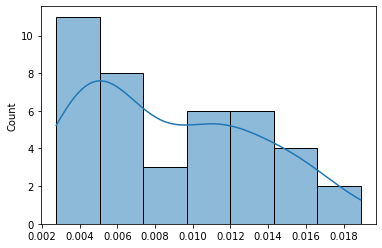

In [13]:
import seaborn as sns
g = sns.histplot(similar_clus_diff_dist, kde=True)
#g.set_xlim(-0.025, + 0.025)

<AxesSubplot:ylabel='Count'>

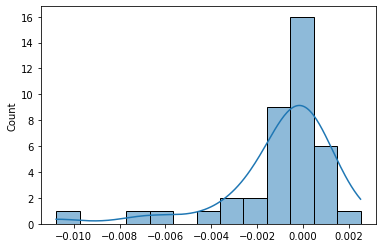

In [14]:
sns.histplot(similar_clus_ene_list, kde=True)

In [15]:
print(sorted(similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

[-0.010765140000000173, -0.007161260000000169, -0.006010540000001896, -0.0042082000000007724, -0.003144840000000926, -0.002615219999999141, -0.0023109699999999123, -0.002288840000002068, -0.0015429000000004578, -0.0015428899999996304, -0.0015427399999978775, -0.001542539999999093, -0.0007379400000004921, -0.000704219999999367, -0.0006970799999983512, -0.00069170000000085, -0.0006193200000019772, -0.0004479199999991579, -0.00035983000000072707, -0.000249829999997786, -0.00022653999999988628, -0.0002097399999989591, -0.00017296000000044387, -0.00015502999999839062, -9.288000000040597e-05, -6.27200000025141e-05, 0.00010251000000138788, 0.00019578999999936286, 0.00022975999999985675, 0.00022977000000068415, 0.0002647000000024491, 0.00033054000000021233, 0.0003362299999984941, 0.0004942200000002117, 0.0009653699999994103, 0.0009653699999994103, 0.0011969300000025385, 0.0011969399999998132, 0.0011969399999998132, 0.0025117399999992074]


In [16]:
print(sorted(similar_clus_diff_dist))

[0.002752009945715353, 0.0029725954571300367, 0.0034889603784013373, 0.0035430426798302717, 0.0035889883086052538, 0.00400905780804281, 0.004418676114046491, 0.0046306156811200955, 0.004781389970104133, 0.00486549335375383, 0.004928106552378145, 0.005085592179836604, 0.005093015368939177, 0.005123946247050065, 0.005283715263478483, 0.005642032969822228, 0.006105857941388279, 0.006629513759629238, 0.007226112239397647, 0.007644440312151404, 0.00813178484719393, 0.008712286881442072, 0.010240155818307659, 0.010240184742601258, 0.010528295705615948, 0.010807760713908446, 0.011108273577807401, 0.011354880181891208, 0.012108889155085456, 0.012108933079902864, 0.0121100292807758, 0.012111089650952422, 0.014165522153224294, 0.014165526758023392, 0.015396370734785794, 0.015396388803620556, 0.015396431960262677, 0.015628456329891807, 0.01685794207985851, 0.018902287872691395]


In [17]:
import pickle
with open ('Au8_similar_clus_diff_dist.pkl', 'wb') as fh:
    pickle.dump(similar_clus_diff_dist, fh)
with open ('Au8_similar_clus_ene_list.pkl', 'wb') as fh:
    pickle.dump(similar_clus_ene_list, fh)